In [2]:
2**10


1024

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


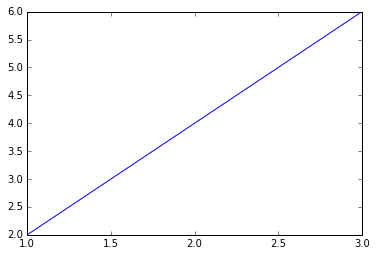

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)


In [28]:
from pprint import pprint
from bigquery import get_client
import pandas as pd

JSON_KEY_FILE = "Oceanus-dev-784c5c9ec4b7.json"
bq = get_client(json_key_file=JSON_KEY_FILE, readonly=True)

job_id, results = bq.query("""
SELECT 
    b.prefecture,
    o.dev as dev,
    COUNT(*) as count,
FROM [oceanus-dev:oceanus_prod.oceanus_v3_bizocean_20160904] as o
    JOIN [oceanus-dev:temp_tables.member_20160905] as b
        ON o.uid = b.member_id
    WHERE o.evt == "emailopen" AND dev == "pc"
    GROUP BY b.prefecture, dev
    ORDER BY dev ASC , count  DESC
LIMIT 1000
""", timeout=100)

df = pd.DataFrame(results)
df

,b_prefecture,count,dev
0,東京都,6376,pc
1,大阪府,2228,pc
2,神奈川県,1368,pc
3,愛知県,1349,pc
4,福岡県,970,pc
5,北海道,966,pc
6,埼玉県,947,pc
7,千葉県,760,pc
8,兵庫県,680,pc
9,静岡県,560,pc


In [29]:
job_id, results = bq.query("""
SELECT 
    b.employee_scale,
    o.dev as dev,
    COUNT(*) as count,
FROM [oceanus-dev:oceanus_prod.oceanus_v3_bizocean_20160904] as o
    JOIN [oceanus-dev:temp_tables.member_20160905] as b
        ON o.uid = b.member_id
    WHERE o.evt == "emailopen" AND dev == "pc"
    GROUP BY b.employee_scale, dev
    ORDER BY dev ASC , count  DESC
LIMIT 1000
""", timeout=100)

df = pd.DataFrame(results)
df

,b_employee_scale,count,dev
0,1～9名,9373,pc
1,10～49名,5322,pc
2,100～299名,2607,pc
3,50～99名,2153,pc
4,500～999名,990,pc
5,1000～2999名,977,pc
6,300～499名,811,pc
7,10000名以上,539,pc
8,3000～4999名,316,pc
9,5000～9999名,245,pc


In [33]:
job_id, results = bq.query("""
SELECT 
    b.job_spec1,
    o.dev as dev,
    COUNT(*) as count,
FROM [oceanus-dev:oceanus_prod.oceanus_v3_bizocean_20160904] as o
    JOIN [oceanus-dev:temp_tables.member_20160905] as b
        ON o.uid = b.member_id
    WHERE o.evt == "emailopen" AND dev == "pc"
    GROUP BY job_spec1, dev
    ORDER BY dev ASC , count  DESC
LIMIT 1000
""", timeout=100)

df = pd.DataFrame(results)
df

,b_job_spec1,count,dev
0,経営者・役員,5279,pc
1,営業・販売,3903,pc
2,その他,2998,pc
3,一般事務,1556,pc
4,総務・法務,1348,pc
5,専門職（建築・土木関連）,1101,pc
6,財務・経理,928,pc
7,生産・製造,770,pc
8,経営企画,644,pc
9,編集・編成・制作・デザイン,607,pc


クリック率

In [63]:
job_id, results = bq.query("""
SELECT open.job_spec1 as job_spec1,
       open.open_count as open_count, 
       click.click_count as   click_count,
       (click_count / open_count) * 100  as ctr
FROM 
( SELECT 
    b.job_spec1 as job_spec1,
    COUNT(*) as open_count
FROM (
        SELECT uid, evt  FROM TABLE_DATE_RANGE(
            [oceanus-dev:oceanus_prod.oceanus_v3_bizocean_], 
            TIMESTAMP('2016-09-03'), 
            TIMESTAMP('2016-09-04')
        )
     ) as o
    JOIN [oceanus-dev:temp_tables.member_20160906] as b ON o.uid = b.member_id
    WHERE o.evt == "emailopen"
    GROUP BY job_spec1
) as open

JOIN

(SELECT 
    b.job_spec1 as job_spec1,
    COUNT(*) as click_count
FROM (
        SELECT uid, evt  FROM TABLE_DATE_RANGE(
            [oceanus-dev:oceanus_prod.oceanus_v3_bizocean_], 
            TIMESTAMP('2016-09-03'), 
            TIMESTAMP('2016-09-04')
        )
     ) as o
    JOIN [oceanus-dev:temp_tables.member_20160906] as b ON o.uid = b.member_id
    WHERE o.evt == "emailclick"
    GROUP BY job_spec1
) as click
ON open.job_spec1 = click.job_spec1
""", timeout=100)

df = pd.DataFrame(results)
df

,click_count,ctr,job_spec1,open_count
0,54,1.708320,技術（非IT系）,3161
1,86,1.262478,専門職（建築・土木関連）,6812
2,4,0.688468,資材・購買,581
3,30,0.837054,マーケティング,3584
4,11,0.844854,保守・サポート,1302
5,21,2.608696,専門職（会計関連）,805
6,1,1.204819,(未回答),83
7,109,1.301493,一般事務,8375
8,57,1.240479,経営企画,4595
9,13,0.757135,研究・開発,1717
